# Deep Learning para Series de Tiempo

Resolver un problema de predicción de series de tiempo para predecir las mascotas que recibirá un refugio de animales domésticos. Dividir entre perros y gatos.

**Estudiante:** Micaela Del Longo

**Dataset:** https://www.kaggle.com/datasets/jinbonnie/animal-data

**Dataset Original:** https://data.bloomington.in.gov/Public-Works/Animal-Shelter-Animals/e245-r9ub/about_data

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.preprocessing import timeseries_dataset_from_array
from statsmodels.graphics.tsaplots import plot_acf
import datetime

# Análisis Exploratorio de Datos (Más o Menos)

In [16]:
# cargamos el dataset
df = pd.read_csv('micaela_data/Animal_Shelter.csv')
# renombramos las columnas para que tengan un formato más amigable
df = df.rename(
	columns={
		'id': 'ID',
		'intakedate': 'Intake Date',
		'intakereason': 'Intake Reason',
		'istransfer': 'Is Transfer',
		'sheltercode': 'Shelter Code',
		'identichipnumber': 'Identi Chip Number',
		'animalname': 'Animal Name',
		'breedname': 'Breed Name',
		'basecolour': 'Base Colour',
		'speciesname': 'Species Name',
		'animalage': 'Animal Age',
		'sexname': 'Sex Name',
		'location': 'Location',
		'movementdate': 'Movement Date',
		'movementtype': 'Movement Type',
		'istrial': 'Is Trial',
		'returndate': 'Return Date',
		'returnedreason': 'Returned Reason',
		'deceaseddate': 'Deceased Date',
		'deceasedreason': 'Deceased Reason',
		'diedoffshelter': 'Died Off Shelter',
		'puttosleep': 'Put to Sleep',
		'isdoa': 'Is DOA'
	}
)

In [17]:
print("Primeras 15 Filas del Dataset")
df.head(15)

Primeras 15 Filas del Dataset


,ID,Intake Date,Intake Reason,Is Transfer,Shelter Code,Identi Chip Number,Animal Name,Breed Name,Base Colour,Species Name,...,Movement Date,Movement Type,Is Trial,Return Date,Returned Reason,Deceased Date,Deceased Reason,Died Off Shelter,Put to Sleep,Is DOA
0,15801,11/28/2009 12:00:00 AM,Moving,False,C09115463,0A115D7358,Jadzia,Domestic Short Hair,Tortoiseshell,Cat,...,05/13/2017 12:00:00 AM,Adoption,False,NaN,Stray,NaN,Died in care,False,False,False
1,15932,12/08/2009 12:00:00 AM,Moving,False,D09125594,0A11675477,Gonzo,German Shepherd Dog/Mix,Tan,Dog,...,04/24/2017 12:00:00 AM,Adoption,False,NaN,Stray,NaN,Died in care,False,False,False
2,28859,08/10/2012 12:00:00 AM,Abandoned,False,D23111515,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Black and Tan,Dog,...,04/15/2017 12:00:00 AM,Adoption,False,02/28/2020 12:00:00 AM,Stray,06/28/2024 12:00:00 AM,Court Order/ Legal,True,False,False
3,28859,08/10/2012 12:00:00 AM,Abandoned,False,D23111515,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Black and Tan,Dog,...,02/29/2020 12:00:00 AM,Reclaimed,False,11/06/2023 12:00:00 AM,Stray,06/28/2024 12:00:00 AM,Court Order/ Legal,True,False,False
4,28859,08/10/2012 12:00:00 AM,Abandoned,False,D23111515,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Black and Tan,Dog,...,12/17/2023 12:00:00 AM,Adoption,False,NaN,Stray,06/28/2024 12:00:00 AM,Court Order/ Legal,True,False,False
5,28859,08/10/2012 12:00:00 AM,Abandoned,False,D23111515,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Black and Tan,Dog,...,NaN,NaN,False,NaN,Stray,06/28/2024 12:00:00 AM,Court Order/ Legal,True,False,False
6,28859,08/10/2012 12:00:00 AM,Abandoned,False,D23111515,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Black and Tan,Dog,...,NaN,NaN,False,NaN,Stray,06/28/2024 12:00:00 AM,Court Order/ Legal,True,False,False
7,30812,01/11/2013 12:00:00 AM,Abandoned,False,C1301091,0A13403D4D,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,...,04/18/2017 12:00:00 AM,Foster,False,05/29/2018 12:00:00 AM,Stray,NaN,Died in care,False,False,False
8,30812,01/11/2013 12:00:00 AM,Abandoned,False,C1301091,0A13403D4D,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,...,05/29/2018 12:00:00 AM,Adoption,False,NaN,Stray,NaN,Died in care,False,False,False
9,31469,03/26/2013 12:00:00 AM,Incompatible with owner lifestyle,False,D1303720,981020007006095,Bonnie,Basenji/Mix,Brown and White,Dog,...,03/30/2013 12:00:00 AM,Adoption,False,05/08/2017 12:00:00 AM,Incompatible with owner lifestyle,NaN,Died in care,False,False,False


In [18]:
print("Tipos de Datos")
print(df.dtypes)

print("\nCantidad de Filas: %d\nCantidad de Columnas: %d\n" % (df.shape[0], df.shape[1]))

print("Duplicados: %d" % df.duplicated().sum())


Tipos de Datos
ID                     int64
Intake Date           object
Intake Reason         object
Is Transfer             bool
Shelter Code          object
Identi Chip Number    object
Animal Name           object
Breed Name            object
Base Colour           object
Species Name          object
Animal Age            object
Sex Name              object
Location              object
Movement Date         object
Movement Type         object
Is Trial                bool
Return Date           object
Returned Reason       object
Deceased Date         object
Deceased Reason       object
Died Off Shelter        bool
Put to Sleep            bool
Is DOA                  bool
dtype: object

Cantidad de Filas: 36613
Cantidad de Columnas: 23

Duplicados: 3645


## Descripción de las Columnas

| Columna            | Descripción                                              |
|--------------------|----------------------------------------------------------|
| ID                 | ID del animal en el refugio                              |
| Intake Date        | Fecha en la que ingresó el animal por 1ra vez al refugio |
| Intake Reason      | Razón de ingreso del animal al refugio                   |
| Is Transfer        | Si el animal fue transferido a el refugio                |
| Shelter Code       | Código del refugio                                       |
| Identi Chip Number | Número de identificación del animal                      |
| Animal Name        | Nombre del animal                                        |
| Breed Name         | Raza del animal                                          |
| Base Colour        | Color del animal                                         |
| Species Name       | Especie del animal                                       |
| Animal Age         | Edad del animal                                          |
| Sex Name           | Sexo del animal                                          |
| Location           | Ubicación del animal                                     |
| Movement Date      | Fecha de movimiento afuera del refugio del animal        |
| Movement Type      | Tipo de movimiento                                       |
| Is Trial           | Si el animal está en prueba                              |
| Return Date        | Fecha de retorno del animal al refugio                   |
| Returned Reason    | Razón de retorno                                         |
| Deceased Date      | Fecha de fallecimiento del animal                        |
| Deceased Reason    | Razón de fallecimiento                                   |
| Died Off Shelter   | Si el animal murió fuera del refugio                     |
| Put to Sleep       | Si el animal fue sacrificado                             |
| Is DOA             | Si el animal llegó muerto al refugio                     |

# Preprocesamiento de Datos

In [19]:
# eliminar todas las filas que no sean perros o gatos
df_filtered = df[df['Species Name'].isin(['Dog', 'Cat'])].copy()

# convertir las fechas a formato datetime
df_filtered['Intake DateTime'] = pd.to_datetime(df_filtered['Intake Date'], format='%m/%d/%Y %I:%M:%S %p').dt.date
df_filtered['Movement DateTime'] = pd.to_datetime(df_filtered['Movement Date'], format='%m/%d/%Y %I:%M:%S %p').dt.date
df_filtered['Return DateTime'] = pd.to_datetime(df_filtered['Return Date'], format='%m/%d/%Y %I:%M:%S %p').dt.date
df_filtered['Deceased DateTime'] = pd.to_datetime(df_filtered['Deceased Date'], format='%m/%d/%Y %I:%M:%S %p').dt.date

print("\nCantidad de Filas: %d\nCantidad de Columnas: %d\n" % (df_filtered.shape[0], df_filtered.shape[1]))

df_filtered.head(10)


Cantidad de Filas: 35158
Cantidad de Columnas: 27



,ID,Intake Date,Intake Reason,Is Transfer,Shelter Code,Identi Chip Number,Animal Name,Breed Name,Base Colour,Species Name,...,Returned Reason,Deceased Date,Deceased Reason,Died Off Shelter,Put to Sleep,Is DOA,Intake DateTime,Movement DateTime,Return DateTime,Deceased DateTime
0,15801,11/28/2009 12:00:00 AM,Moving,False,C09115463,0A115D7358,Jadzia,Domestic Short Hair,Tortoiseshell,Cat,...,Stray,NaN,Died in care,False,False,False,2009-11-28,2017-05-13,NaT,NaT
1,15932,12/08/2009 12:00:00 AM,Moving,False,D09125594,0A11675477,Gonzo,German Shepherd Dog/Mix,Tan,Dog,...,Stray,NaN,Died in care,False,False,False,2009-12-08,2017-04-24,NaT,NaT
2,28859,08/10/2012 12:00:00 AM,Abandoned,False,D23111515,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Black and Tan,Dog,...,Stray,06/28/2024 12:00:00 AM,Court Order/ Legal,True,False,False,2012-08-10,2017-04-15,2020-02-28,2024-06-28
3,28859,08/10/2012 12:00:00 AM,Abandoned,False,D23111515,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Black and Tan,Dog,...,Stray,06/28/2024 12:00:00 AM,Court Order/ Legal,True,False,False,2012-08-10,2020-02-29,2023-11-06,2024-06-28
4,28859,08/10/2012 12:00:00 AM,Abandoned,False,D23111515,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Black and Tan,Dog,...,Stray,06/28/2024 12:00:00 AM,Court Order/ Legal,True,False,False,2012-08-10,2023-12-17,NaT,2024-06-28
5,28859,08/10/2012 12:00:00 AM,Abandoned,False,D23111515,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Black and Tan,Dog,...,Stray,06/28/2024 12:00:00 AM,Court Order/ Legal,True,False,False,2012-08-10,NaT,NaT,2024-06-28
6,28859,08/10/2012 12:00:00 AM,Abandoned,False,D23111515,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Black and Tan,Dog,...,Stray,06/28/2024 12:00:00 AM,Court Order/ Legal,True,False,False,2012-08-10,NaT,NaT,2024-06-28
7,30812,01/11/2013 12:00:00 AM,Abandoned,False,C1301091,0A13403D4D,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,...,Stray,NaN,Died in care,False,False,False,2013-01-11,2017-04-18,2018-05-29,NaT
8,30812,01/11/2013 12:00:00 AM,Abandoned,False,C1301091,0A13403D4D,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,...,Stray,NaN,Died in care,False,False,False,2013-01-11,2018-05-29,NaT,NaT
9,31469,03/26/2013 12:00:00 AM,Incompatible with owner lifestyle,False,D1303720,981020007006095,Bonnie,Basenji/Mix,Brown and White,Dog,...,Incompatible with owner lifestyle,NaN,Died in care,False,False,False,2013-03-26,2013-03-30,2017-05-08,NaT


In [20]:
# Cantidad de fechas únicas en cada columna
print("Cantidad de Intake DateTimes Únicos: %d" % len(df_filtered['Intake DateTime'].unique()))
print("Cantidad de Movement DateTimes Únicos: %d" % len(df_filtered['Movement DateTime'].unique()))
print("Cantidad de Return DateTimes Únicos: %d" % len(df_filtered['Return DateTime'].unique()))
print("Cantidad de Deceased DateTimes Únicos: %d" % len(df_filtered['Deceased DateTime'].unique()))

Cantidad de Intake DateTimes Únicos: 2604
Cantidad de Movement DateTimes Únicos: 2648
Cantidad de Return DateTimes Únicos: 2386
Cantidad de Deceased DateTimes Únicos: 566


## Transformación del DataSet

In [21]:
df_grouped = transform_data(df_filtered)
df_grouped.head(15)

Species Name,Intake Cats,Intake Dogs,Moved Cats,Moved Dogs,Returned Cats,Returned Dogs,Deceased Cats,Deceased Dogs
Date,,,,,,,,
2009-11-28,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009-12-08,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-08-10,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-01-11,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-03-26,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-10-09,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-10-26,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-11-21,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-11,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Visualización de Datos

In [22]:
df_grouped.describe()

Species Name,Intake Cats,Intake Dogs,Moved Cats,Moved Dogs,Returned Cats,Returned Dogs,Deceased Cats,Deceased Dogs
count,2745.00000,2745.000000,2745.000000,2745.000000,2745.000000,2745.000000,2745.000000,2745.000000
mean,4.15592,2.563570,6.636066,3.895082,2.603279,1.409107,0.158106,0.092896
std,4.23814,2.664771,5.842298,2.959874,3.271318,1.680966,0.459505,0.315600
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.00000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,3.00000,2.000000,5.000000,3.000000,1.000000,1.000000,0.000000,0.000000
75%,6.00000,4.000000,9.000000,5.000000,4.000000,2.000000,0.000000,0.000000
max,30.00000,57.000000,74.000000,28.000000,35.000000,15.000000,6.000000,3.000000


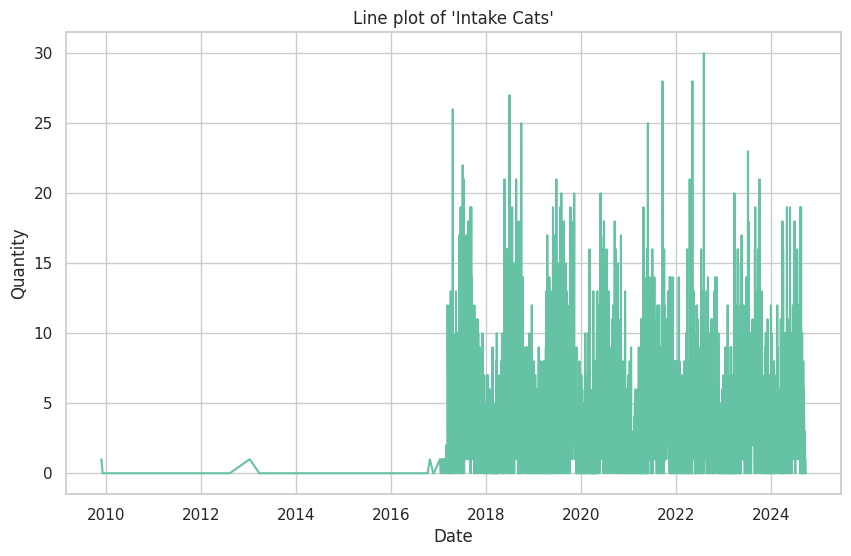

In [39]:
# Gatos ingresados al refugio
plot_category(df_grouped, 'Intake Cats', "Line plot of 'Intake Cats'") #TO DO: smooth

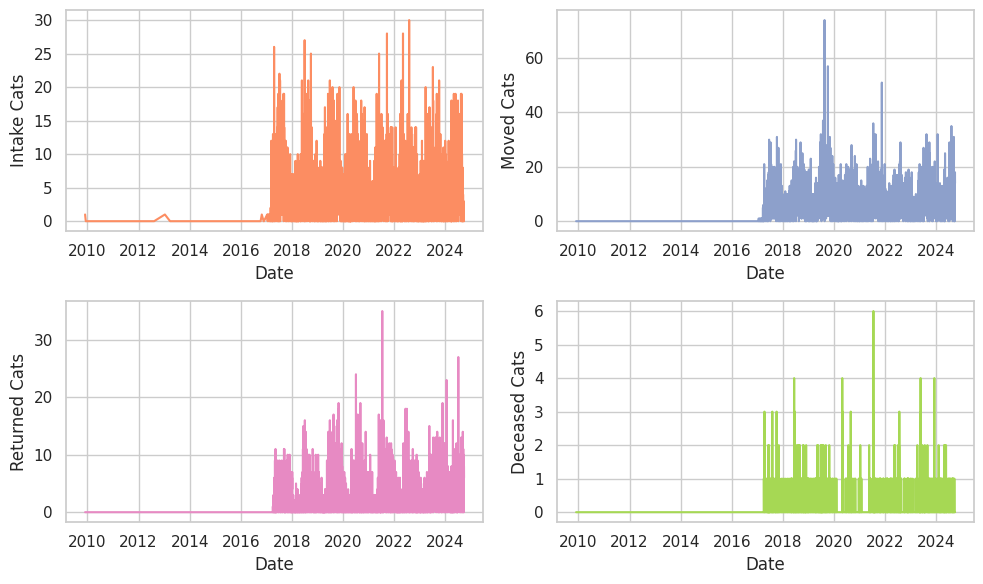

In [40]:
# Gatos ingresados/trasladados/retornados/fallecidos
plot_cat_categories(df_grouped)

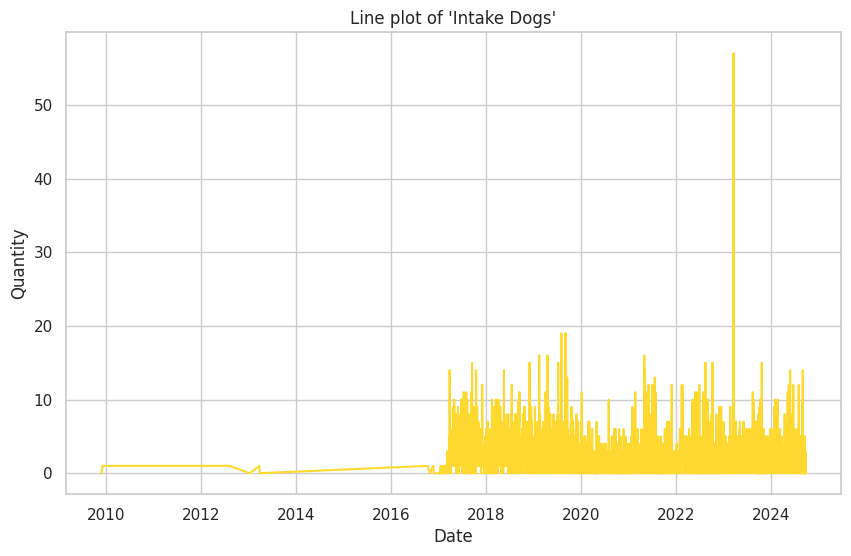

In [41]:
# Perros ingresados al refugio
plot_category(df_grouped, 'Intake Dogs', "Line plot of 'Intake Dogs'")

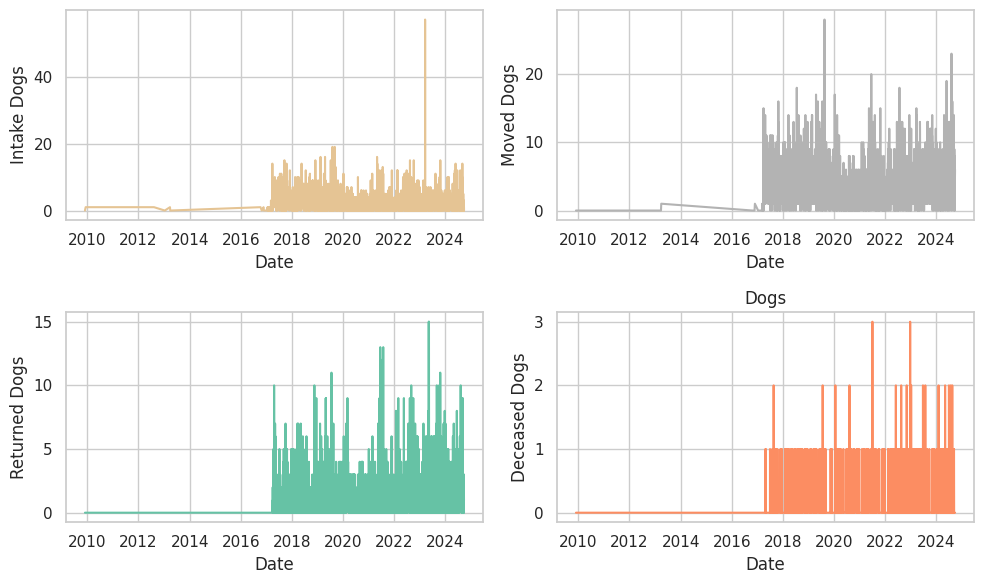

In [42]:
# Perros ingresados/trasladados/retornados/fallecidos
plot_dog_categories(df_grouped)

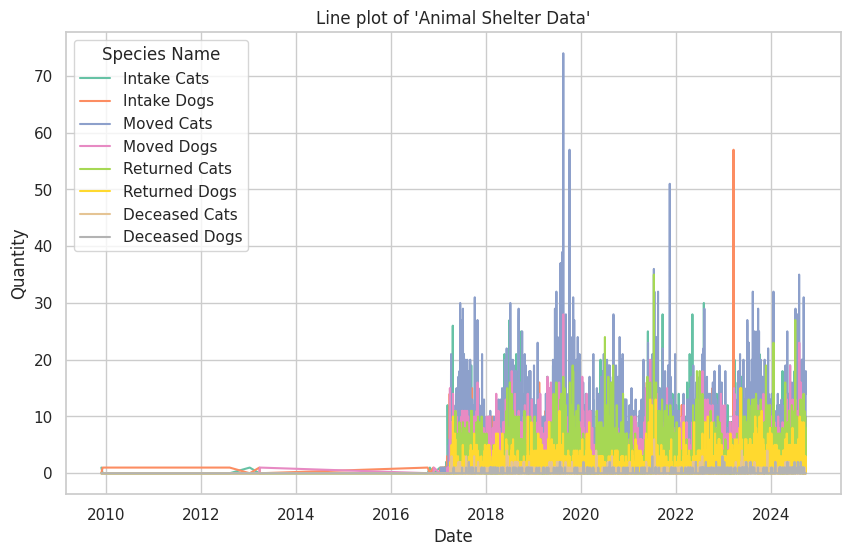

In [60]:
# Todas las categorías
plot_series(df_grouped, "Line plot of 'Animal Shelter Data'")

## Tomando Intervalos de Tiempo

### Diario

In [61]:
df_daily = df_grouped.resample('D').sum()
print("Cantidad de Filas: %d\nCantidad de Columnas: %d\n" % (df_daily.shape[0], df_daily.shape[1]))
df_daily.tail(10)

Cantidad de Filas: 5414
Cantidad de Columnas: 8



Species Name,Intake Cats,Intake Dogs,Moved Cats,Moved Dogs,Returned Cats,Returned Dogs,Deceased Cats,Deceased Dogs
Date,,,,,,,,
2024-09-14,0.0,0.0,16.0,8.0,5.0,3.0,0.0,0.0
2024-09-15,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0
2024-09-16,3.0,2.0,7.0,2.0,4.0,2.0,0.0,0.0
2024-09-17,1.0,0.0,10.0,2.0,10.0,0.0,0.0,0.0
2024-09-18,1.0,0.0,0.0,0.0,10.0,1.0,0.0,0.0
2024-09-19,1.0,2.0,10.0,3.0,6.0,0.0,0.0,0.0
2024-09-20,1.0,3.0,4.0,8.0,2.0,3.0,0.0,0.0
2024-09-21,0.0,0.0,8.0,5.0,0.0,1.0,0.0,0.0
2024-09-22,0.0,1.0,18.0,5.0,8.0,1.0,0.0,0.0


In [62]:
df_daily.head(10)

Species Name,Intake Cats,Intake Dogs,Moved Cats,Moved Dogs,Returned Cats,Returned Dogs,Deceased Cats,Deceased Dogs
Date,,,,,,,,
2009-11-28,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009-11-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009-11-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009-12-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009-12-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009-12-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009-12-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009-12-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
df_daily.describe()

Species Name,Intake Cats,Intake Dogs,Moved Cats,Moved Dogs,Returned Cats,Returned Dogs,Deceased Cats,Deceased Dogs
count,5414.000000,5414.000000,5414.000000,5414.000000,5414.000000,5414.000000,5414.000000,5414.000000
mean,2.107130,1.299778,3.364610,1.974880,1.319911,0.714444,0.080163,0.047100
std,3.663771,2.289683,5.320892,2.869493,2.668172,1.388808,0.336578,0.229454
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,2.000000,5.000000,3.000000,1.000000,1.000000,0.000000,0.000000
max,30.000000,57.000000,74.000000,28.000000,35.000000,15.000000,6.000000,3.000000


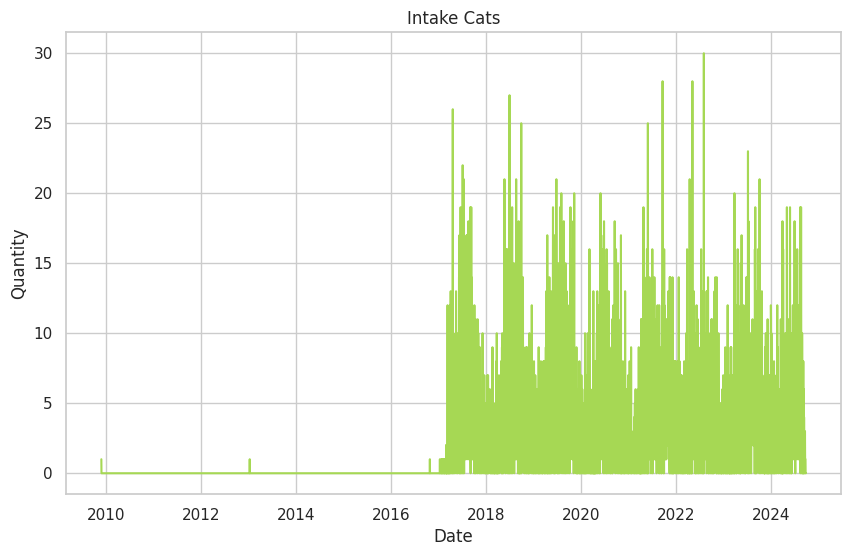

In [64]:
plot_category(df_daily, 'Intake Cats', 'Intake Cats')

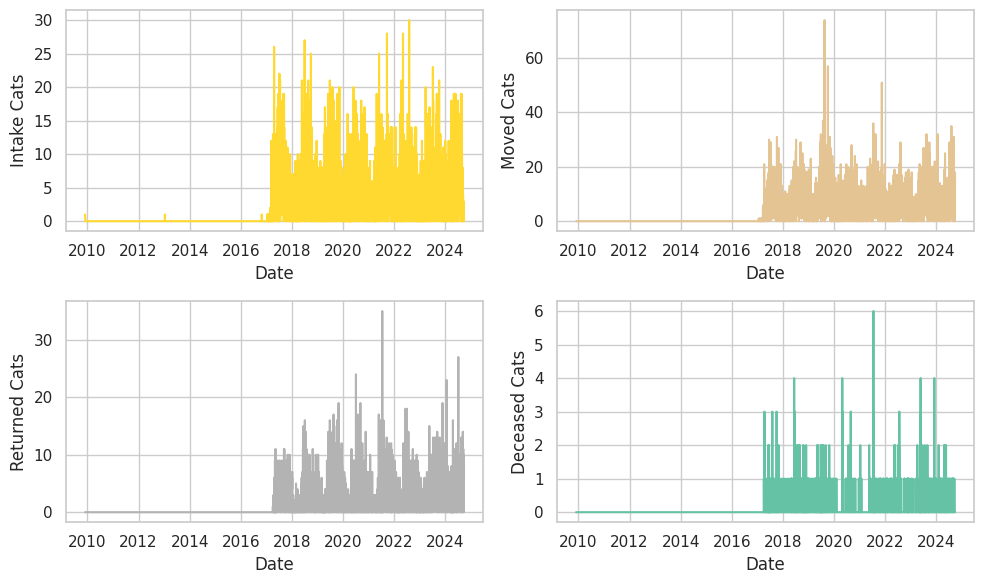

In [65]:
plot_cat_categories(df_daily)

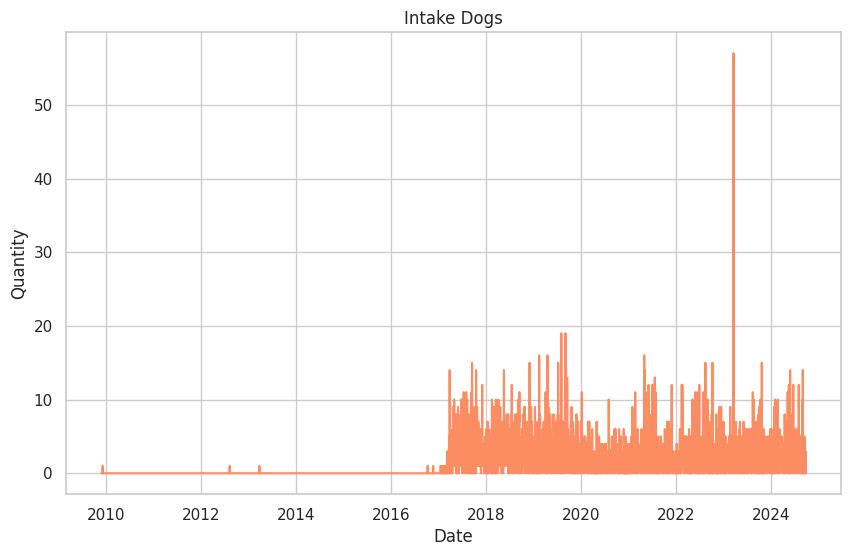

In [66]:
plot_category(df_daily, 'Intake Dogs', 'Intake Dogs')

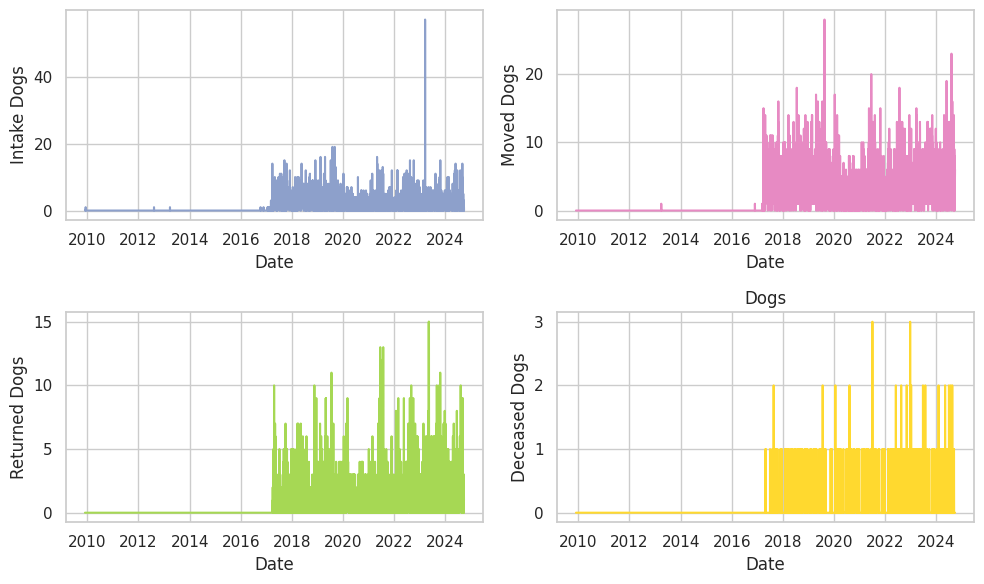

In [67]:
plot_dog_categories(df_daily)

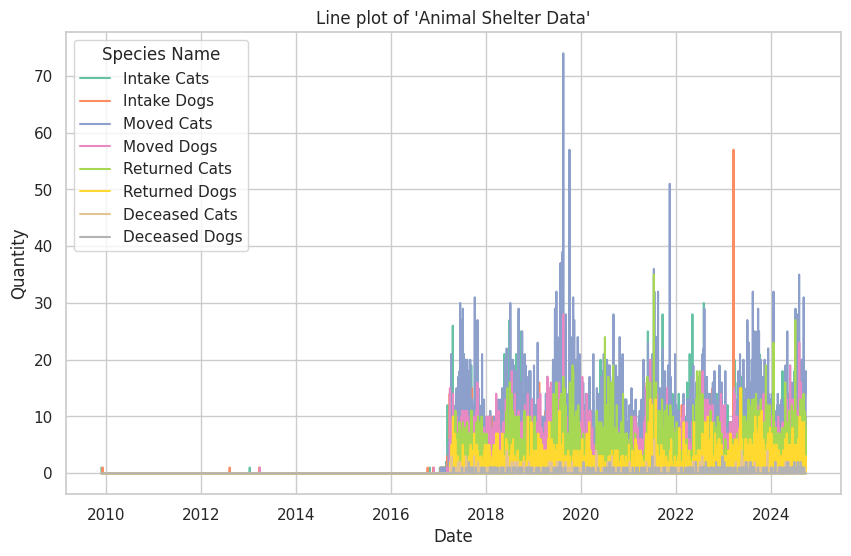

In [68]:
plot_series(df_daily, "Line plot of 'Animal Shelter Data'")

### Semanal

In [69]:
df_weekly = df_grouped.resample('W').sum()
print("Cantidad de Filas: %d\nCantidad de Columnas: %d\n" % (df_weekly.shape[0], df_weekly.shape[1]))
df_weekly.head(10)

Cantidad de Filas: 775
Cantidad de Columnas: 8



Species Name,Intake Cats,Intake Dogs,Moved Cats,Moved Dogs,Returned Cats,Returned Dogs,Deceased Cats,Deceased Dogs
Date,,,,,,,,
2009-11-29,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009-12-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009-12-13,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2009-12-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009-12-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-01-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-01-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
df_weekly.describe()

Species Name,Intake Cats,Intake Dogs,Moved Cats,Moved Dogs,Returned Cats,Returned Dogs,Deceased Cats,Deceased Dogs
count,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000
mean,14.720000,9.080000,23.504516,13.796129,9.220645,4.990968,0.560000,0.329032
std,17.584063,10.528234,27.304336,15.149632,12.026095,6.216064,1.154119,0.709020
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,6.000000,13.000000,8.000000,1.000000,1.000000,0.000000,0.000000
75%,27.000000,17.000000,44.000000,28.000000,17.000000,9.000000,1.000000,0.000000
max,87.000000,80.000000,127.000000,74.000000,56.000000,35.000000,10.000000,4.000000


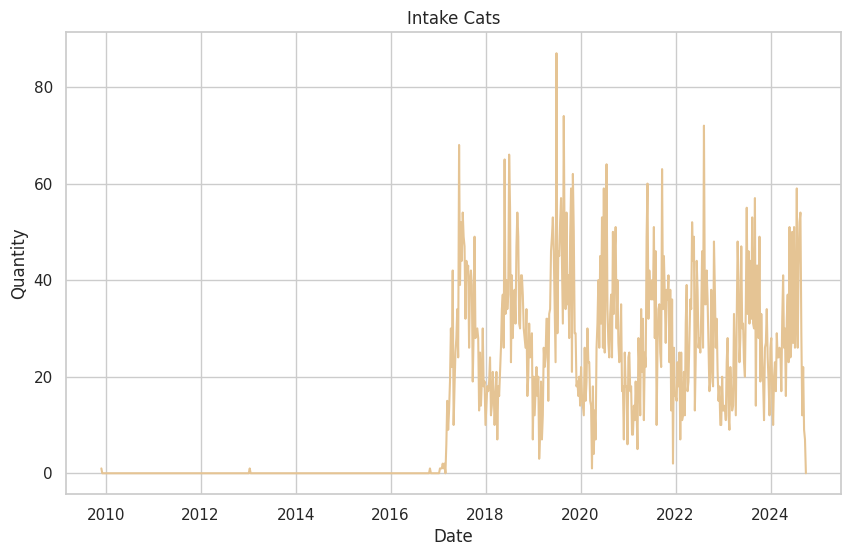

In [71]:
plot_category(df_weekly, 'Intake Cats', 'Intake Cats')

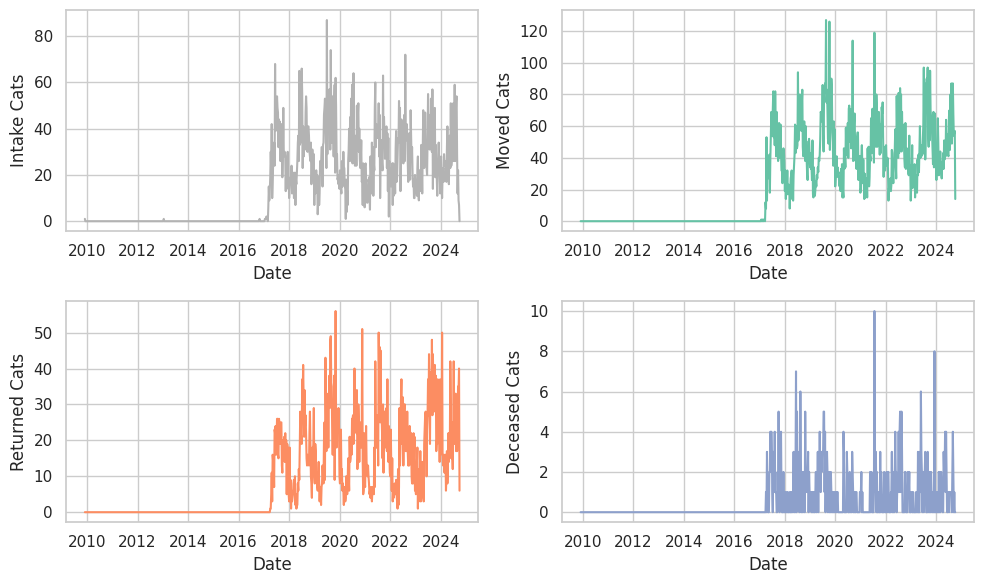

In [72]:
plot_cat_categories(df_weekly)

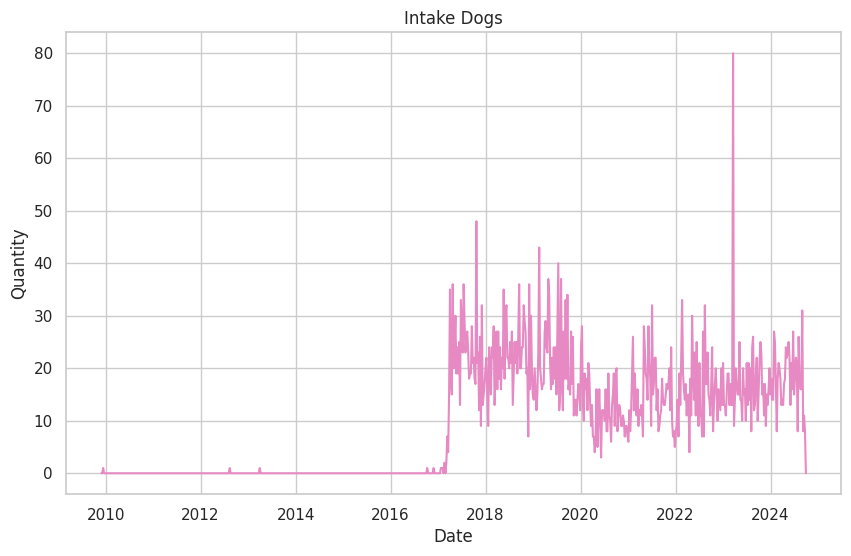

In [73]:
plot_category(df_weekly, 'Intake Dogs', 'Intake Dogs')

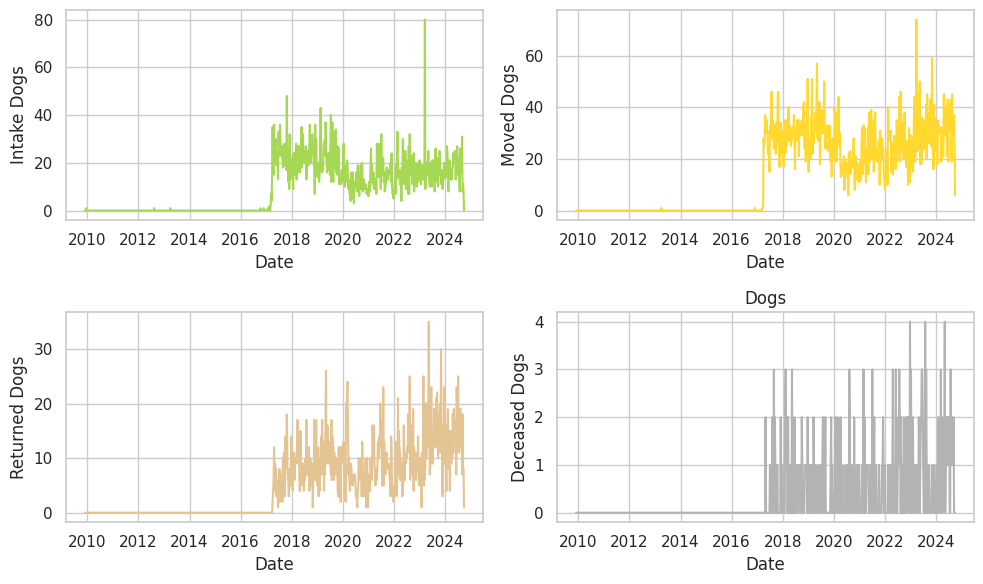

In [74]:
plot_dog_categories(df_weekly)

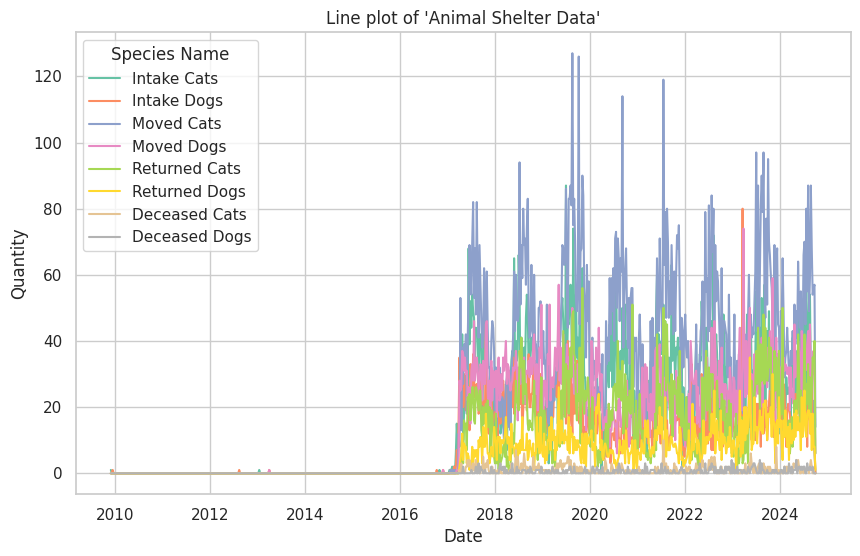

In [75]:
plot_series(df_weekly, "Line plot of 'Animal Shelter Data'")

## Variación de los Datos

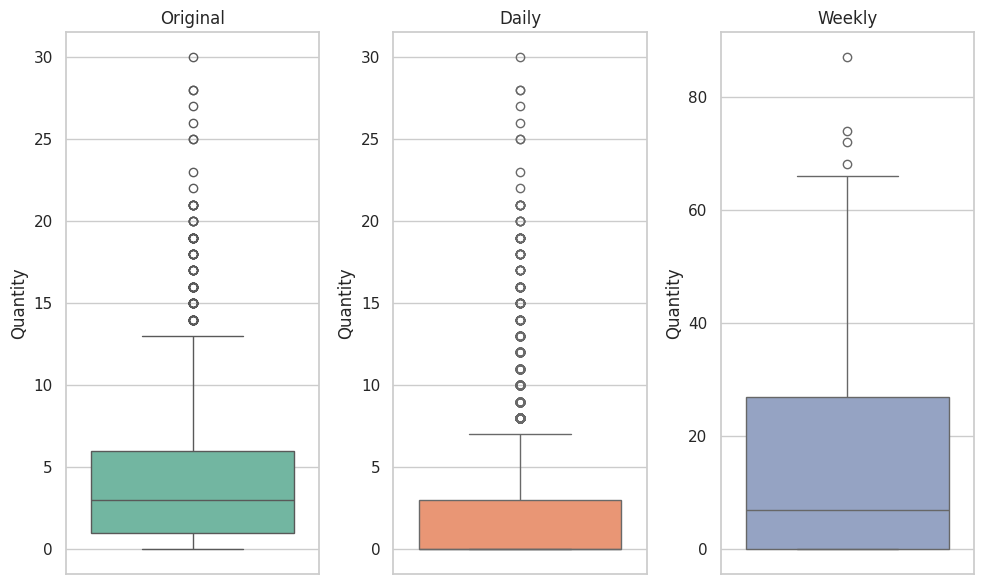

In [79]:
compare_boxplots(df_grouped, df_daily, df_weekly, 'Intake Cats', 'Intake Cats')

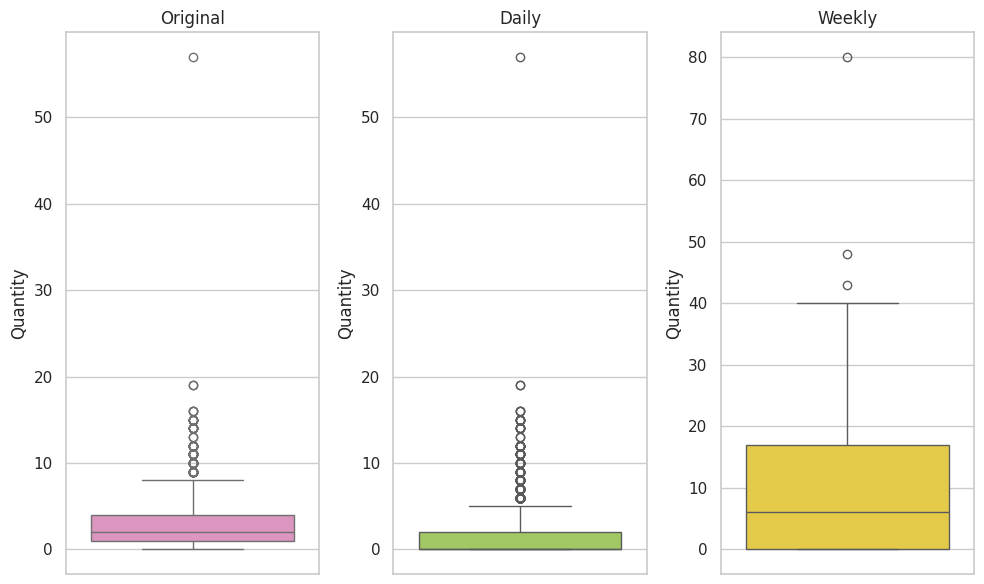

In [81]:
compare_boxplots(df_grouped, df_daily, df_weekly, 'Intake Dogs', 'Intake Dogs')

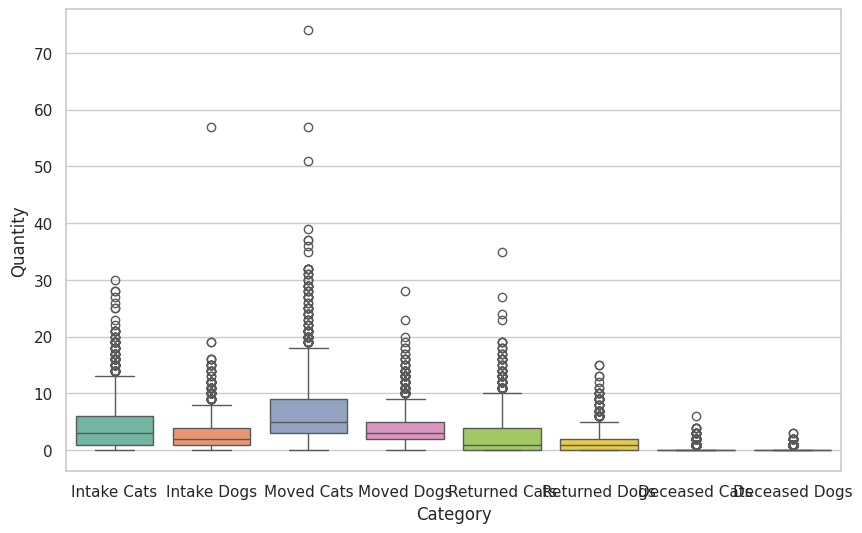

In [82]:
boxplot(df_grouped, 'Comparison of the original categories')

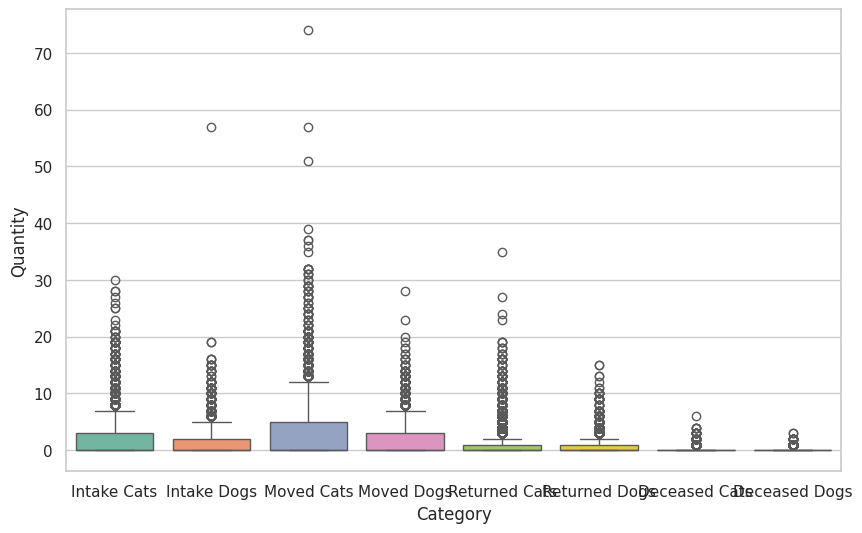

In [83]:
boxplot(df_daily, 'Comparison of the daily categories')

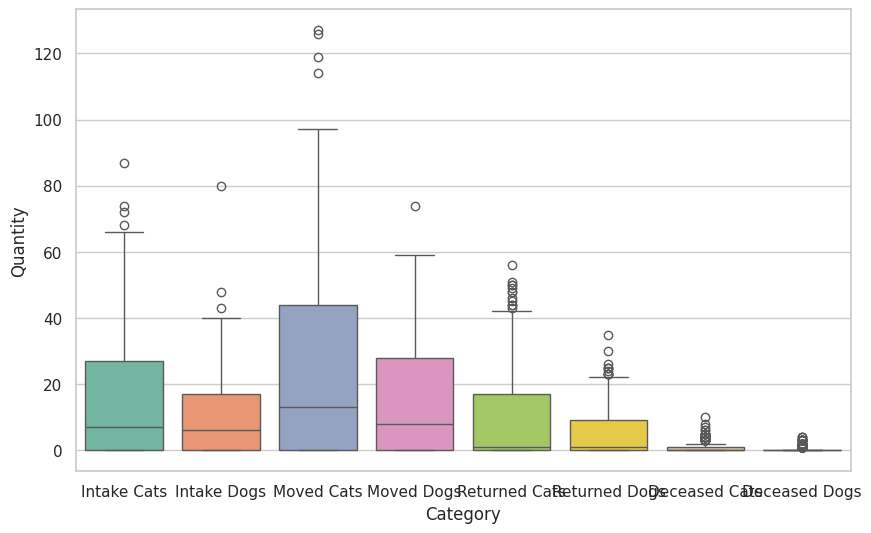

In [84]:
boxplot(df_weekly, 'Comparison of the weekly categories')

## Autocorrelación

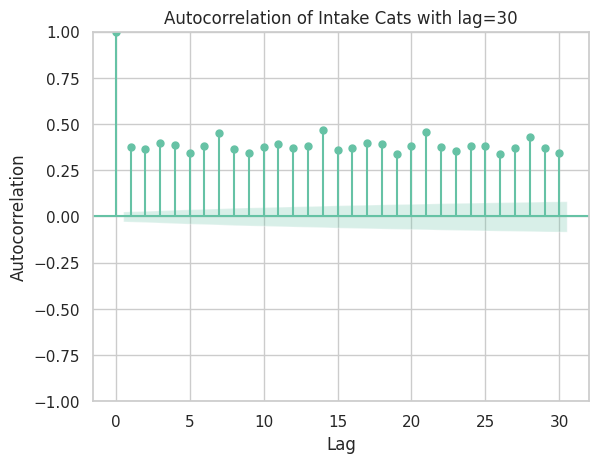

In [95]:
plot_autocorrelation(df_daily, 'Intake Cats', 30)

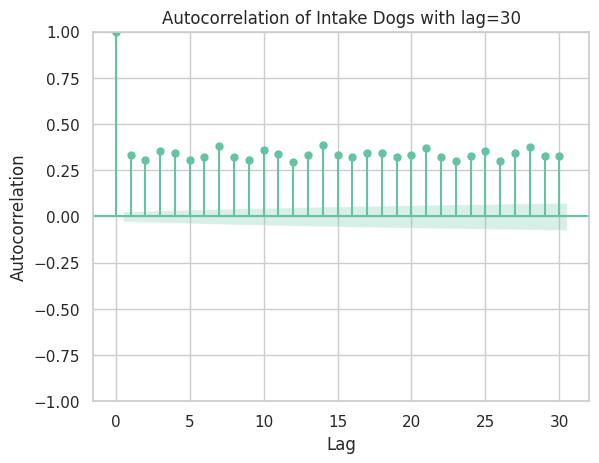

In [96]:
plot_autocorrelation(df_daily, 'Intake Dogs', 30)

# Preparación de Datos

In [118]:
# Eliminar los valores anteriores a 2017
df_daily_2017 = df_daily[df_daily.index >= '2017-01-01']
print("Cantidad de Filas: %d\nCantidad de Columnas: %d\n" % (df_daily_2017.shape[0], df_daily_2017.shape[1]))

Cantidad de Filas: 2823
Cantidad de Columnas: 8



In [119]:
# Definir el número de muestras de entrenamiento, validación y prueba

num_train_samples = int(0.7 * df_daily_2017.shape[0])
num_val_samples = int(0.15 * df_daily_2017.shape[0])
num_test_samples = df_daily_2017.shape[0] - num_train_samples - num_val_samples

print("Train Samples: %d\nValidation Samples: %d\nTest Samples: %d\n" % (num_train_samples, num_val_samples, num_test_samples))

Train Samples: 1976
Validation Samples: 423
Test Samples: 424



## Preparación para "Intake Cats" 🐱

In [120]:
data = df_daily_2017[['Intake Cats', 'Intake Dogs', 'Moved Cats', 'Moved Dogs', 'Returned Cats', 'Returned Dogs']].values
intake_cats = df_daily_2017['Intake Cats'].values

# separar los datos en entrenamiento, validación y prueba
x_train = data[:num_train_samples]
y_train = intake_cats[:num_train_samples]
x_val = data[num_train_samples:num_train_samples + num_val_samples]
y_val = intake_cats[num_train_samples:num_train_samples + num_val_samples]
x_test = data[-num_test_samples:]
y_test = intake_cats[-num_test_samples:]

print("Train Data Shape: %s" % str(x_train.shape))
print("Validation Data Shape: %s" % str(x_val.shape))
print("Test Data Shape: %s" % str(x_test.shape))

Train Data Shape: (1976, 6)
Validation Data Shape: (423, 6)
Test Data Shape: (424, 6)


In [121]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

In [122]:
sequence_length = 30  # mira hasta 30 días atrás
sampling_rate = 1 # toma una muestra cada día
delay = sampling_rate * (sequence_length + 7 - 1)
batch_size = 32

In [123]:
train_dataset = timeseries_dataset_from_array(
	x_train_scaled[:-delay],
	targets = y_train[delay:],
	sampling_rate = sampling_rate,
	sequence_length = sequence_length,
	shuffle = True,
	batch_size = batch_size
)

val_dataset = timeseries_dataset_from_array(
	x_val_scaled[:-delay],
	targets = y_val[delay:],
	sampling_rate = sampling_rate,
	sequence_length = sequence_length,
	shuffle = True,
	batch_size = batch_size
)

test_dataset = timeseries_dataset_from_array(
	x_test_scaled[:-delay],
	targets = y_test[delay:],
	sampling_rate = sampling_rate,
	sequence_length = sequence_length,
	shuffle = True,
	batch_size = batch_size
)

In [124]:
for x, y in train_dataset.take(1):
  print(x)
  print(y)

tf.Tensor(
[[[0.03571429 0.         0.02702703 0.10714286 0.         0.        ]
  [0.28571429 0.26315789 0.06756757 0.10714286 0.         0.15384615]
  [0.25       0.10526316 0.04054054 0.10714286 0.         0.        ]
  ...
  [0.14285714 0.10526316 0.01351351 0.03571429 0.         0.07692308]
  [0.         0.10526316 0.         0.03571429 0.         0.        ]
  [0.28571429 0.10526316 0.08108108 0.10714286 0.         0.07692308]]

 [[0.25       0.15789474 0.13513514 0.32142857 0.         0.38461538]
  [0.14285714 0.36842105 0.13513514 0.07142857 0.05714286 0.07692308]
  [0.14285714 0.10526316 0.01351351 0.14285714 0.2        0.        ]
  ...
  [0.03571429 0.10526316 0.04054054 0.14285714 0.         0.        ]
  [0.10714286 0.42105263 0.13513514 0.14285714 0.05714286 0.07692308]
  [0.39285714 0.15789474 0.18918919 0.5        0.14285714 0.30769231]]

 [[0.21428571 0.26315789 0.10810811 0.14285714 0.02857143 0.        ]
  [0.07142857 0.05263158 0.14864865 0.10714286 0.08571429 0.307

## Preparación para "Intake Dogs" 🐶

In [167]:
data_dogs = df_daily_2017[['Intake Dogs', 'Intake Cats', 'Moved Cats', 'Moved Dogs', 'Returned Cats', 'Returned Dogs', 'Deceased Cats', 'Deceased Dogs']].values
intake_dogs = df_daily_2017['Intake Dogs'].values

# separar los datos en entrenamiento, validación y prueba
x_train_dog = data_dogs[:num_train_samples]
y_train_dog = intake_dogs[:num_train_samples]
x_val_dog = data_dogs[num_train_samples:num_train_samples + num_val_samples]
y_val_dog = intake_dogs[num_train_samples:num_train_samples + num_val_samples]
x_test_dog = data_dogs[-num_test_samples:]
y_test_dog = intake_dogs[-num_test_samples:]

In [168]:
scaler_dogs = MinMaxScaler()
x_train_dog_scaled = scaler_dogs.fit_transform(x_train_dog)
x_val_dog_scaled = scaler_dogs.transform(x_val_dog)
x_test_dog_scaled = scaler_dogs.transform(x_test_dog)

In [169]:
train_dog_dataset = timeseries_dataset_from_array(
	x_train_dog_scaled[:-delay],
	targets = y_train_dog[delay:],
	sampling_rate = sampling_rate,
	sequence_length = sequence_length,
	shuffle = True,
	batch_size = batch_size
)

val_dog_dataset = timeseries_dataset_from_array(
	x_val_dog_scaled[:-delay],
	targets = y_val_dog[delay:],
	sampling_rate = sampling_rate,
	sequence_length = sequence_length,
	shuffle = True,
	batch_size = batch_size
)

test_dog_dataset = timeseries_dataset_from_array(
	x_test_dog_scaled[:-delay],
	targets = y_test_dog[delay:],
	sampling_rate = sampling_rate,
	sequence_length = sequence_length,
	shuffle = True,
	batch_size = batch_size
)

# Definición Modelos

In [170]:
optimizer = "adam"
loss = "mean_squared_error"
metrics = ["mean_squared_error", "mean_absolute_error"]

In [171]:
def simple_rnn_model(input_shape: tuple):
	model = tf.keras.models.Sequential([
		tf.keras.Input(shape=input_shape),
		tf.keras.layers.SimpleRNN(32, return_sequences=True),
		tf.keras.layers.Dropout(0.5),
		tf.keras.layers.SimpleRNN(32),
		tf.keras.layers.Dense(1)
	])

	model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
	return model

def lstm_model(input_shape: tuple):
	model = tf.keras.models.Sequential([
		tf.keras.Input(shape=input_shape),
		tf.keras.layers.LSTM(32, recurrent_dropout=0.2, return_sequences=True),
		tf.keras.layers.Dropout(0.2),
		tf.keras.layers.LSTM(32, recurrent_dropout=0.2),
		tf.keras.layers.Dropout(0.2),
		tf.keras.layers.Dense(1)
	])
	model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
	return model

def gru_model(input_shape: tuple):
	model = tf.keras.models.Sequential([
		tf.keras.Input(shape=input_shape),
		tf.keras.layers.GRU(32, recurrent_dropout=0.2, return_sequences=True),
		tf.keras.layers.Dropout(0.2),
		tf.keras.layers.GRU(32, recurrent_dropout=0.2),
		tf.keras.layers.Dropout(0.2),
		tf.keras.layers.Dense(1)
	])
	model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
	return model

def gru_model_3(input_shape: tuple):
	model = tf.keras.models.Sequential([
		tf.keras.Input(shape=input_shape),
		tf.keras.layers.GRU(64, recurrent_dropout=0.2, return_sequences=True),
		tf.keras.layers.Dropout(0.2),
		tf.keras.layers.GRU(32, recurrent_dropout=0.2, return_sequences=True),
		tf.keras.layers.Dropout(0.2),
		tf.keras.layers.GRU(32, recurrent_dropout=0.2),
		tf.keras.layers.Dropout(0.2),
		tf.keras.layers.Dense(1)
	])
	model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
	return model

## Predicción de 'Intake Cats'

In [130]:
input_shape = (sequence_length, x_train.shape[-1])
print("Input Shape: %s" % str(input_shape))

Input Shape: (30, 6)


### Simple RNN

In [137]:
simple_rnn = simple_rnn_model(input_shape)
simple_rnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_4 (SimpleRNN)             │ (None, 30, 32)              │           1,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 30, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_5 (SimpleRNN)             │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,361 (13.13 KB)

 Trainable params: 3,361 (13.13 KB)

 Non-trainable params: 0 (0.00 B)

In [146]:
callbacks_simple = [
	tf.keras.callbacks.ModelCheckpoint(f'models/best_simple_{get_time()}.keras', save_best_only=True)
]

In [147]:
simple_history = simple_rnn.fit(
	train_dataset,
	epochs=25,
	validation_data=val_dataset,
	callbacks=callbacks_simple
)

Epoch 1/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 15.1551 - mean_absolute_error: 2.9484 - mean_squared_error: 15.1551 - val_loss: 15.4261 - val_mean_absolute_error: 2.9817 - val_mean_squared_error: 15.4261
Epoch 2/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 15.7512 - mean_absolute_error: 2.9485 - mean_squared_error: 15.7512 - val_loss: 15.5058 - val_mean_absolute_error: 3.0177 - val_mean_squared_error: 15.5058
Epoch 3/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 15.5254 - mean_absolute_error: 2.9956 - mean_squared_error: 15.5254 - val_loss: 15.6054 - val_mean_absolute_error: 3.0645 - val_mean_squared_error: 15.6054
Epoch 4/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 15.1444 - mean_absolute_error: 2.9278 - mean_squared_error: 15.1444 - val_loss: 15.8234 - val_mean_absolute_error: 3.0244 - val_mean_squared_error: 15.8234
Epoch 5/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 15.6757 - mean_absolute_error: 2.9512 - mean_squared_error: 15.6757 - val_loss: 1

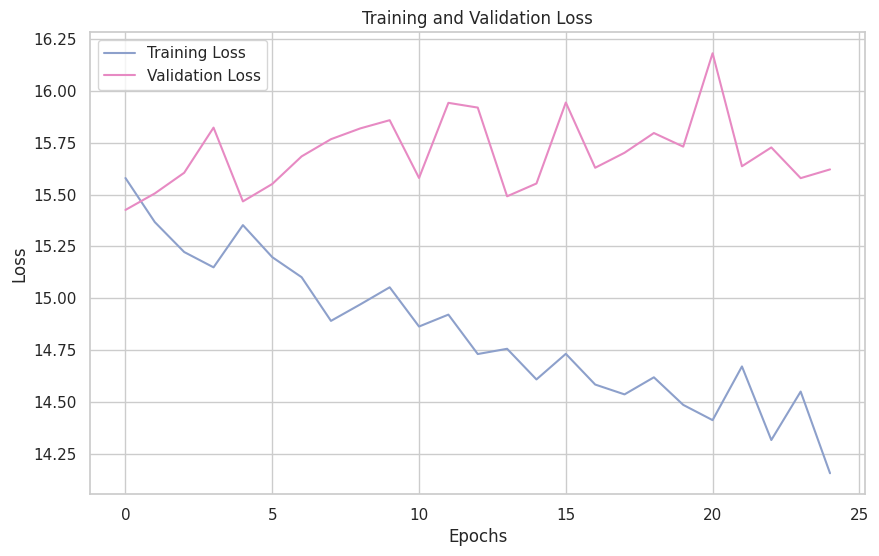

In [148]:
plot_loss(simple_history)

In [149]:
best_simple_model = tf.keras.models.load_model('models/best_simple_2024-09-26_17-07-24.keras')
simple_cat_evaluation = best_simple_model.evaluate(test_dataset)
print("Test MSE: %.4f" % simple_cat_evaluation[1])
print("Test MAE: %.4f" % simple_cat_evaluation[2])

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 13.6995 - mean_absolute_error: 2.8809 - mean_squared_error: 13.6995
Test MSE: 15.7405
Test MAE: 3.0525


### LSTM

In [150]:
lstm = lstm_model(input_shape)
lstm.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 32)              │           4,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 30, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,345 (52.13 KB)

 Trainable params: 13,345 (52.13 KB)

 Non-trainable params: 0 (0.00 B)

In [151]:
callbacks_lstm = [
	tf.keras.callbacks.ModelCheckpoint(f'models/best_lstm_{get_time()}.keras', save_best_only=True)
]

In [152]:
lstm_history = lstm.fit(
	train_dataset,
	epochs=25,
	validation_data=val_dataset,
	callbacks=callbacks_lstm
)

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 13s 121ms/step - loss: 27.9900 - mean_absolute_error: 3.6527 - mean_squared_error: 27.9900 - val_loss: 16.4740 - val_mean_absolute_error: 3.2428 - val_mean_squared_error: 16.4740
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - loss: 18.6277 - mean_absolute_error: 3.3544 - mean_squared_error: 18.6277 - val_loss: 16.2116 - val_mean_absolute_error: 3.1799 - val_mean_squared_error: 16.2116
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 120ms/step - loss: 17.9439 - mean_absolute_error: 3.2521 - mean_squared_error: 17.9439 - val_loss: 15.9596 - val_mean_absolute_error: 3.1591 - val_mean_squared_error: 15.9596
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 119ms/step - loss: 17.7406 - mean_absolute_error: 3.1634 - mean_squared_error: 17.7406 - val_loss: 16.4314 - val_mean_absolute_error: 3.2607 - val_mean_squared_error: 16.4314
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - loss: 17.5358 - mean_absolute_error: 3.2259 - mean_squared_error: 17.5358 - val_lo

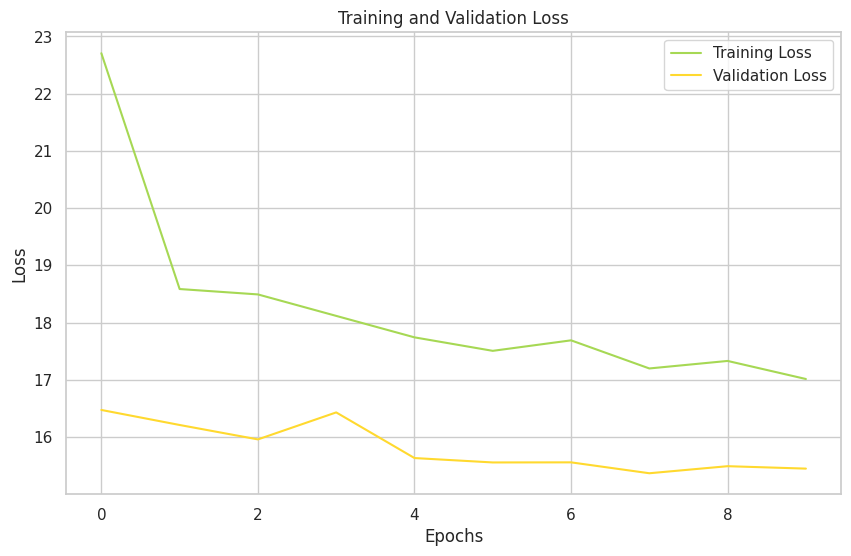

In [153]:
plot_loss(lstm_history)

In [155]:
best_lstm_model = tf.keras.models.load_model('models/best_lstm_2024-09-26_17-12-51.keras')
lstm_cat_evaluation = best_lstm_model.evaluate(test_dataset)
print("Test MSE: %.4f" % lstm_cat_evaluation[1])
print("Test MAE: %.4f" % lstm_cat_evaluation[2])

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 14.2137 - mean_absolute_error: 2.9249 - mean_squared_error: 14.2137
Test MSE: 15.8882
Test MAE: 3.0732


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


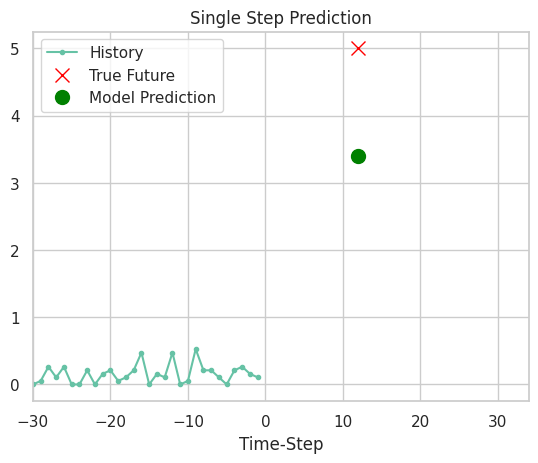

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


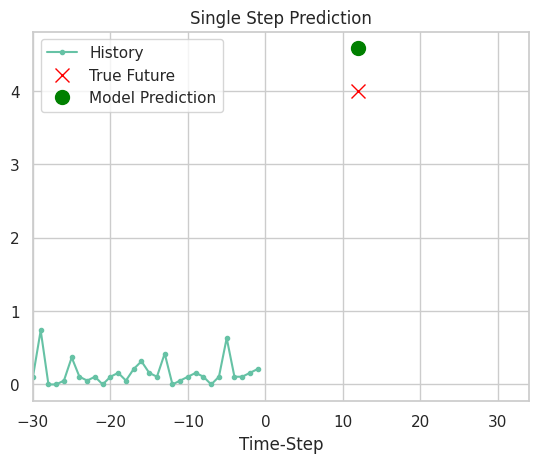

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


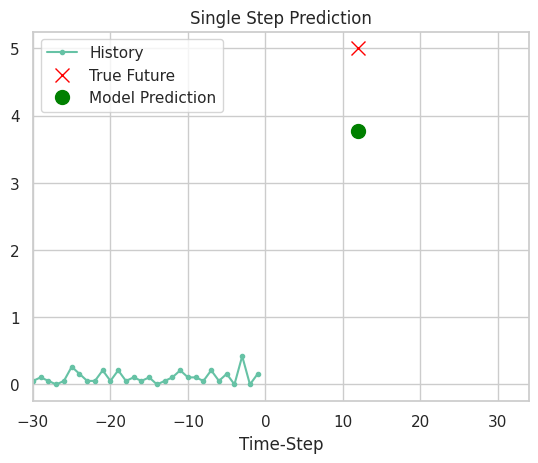

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


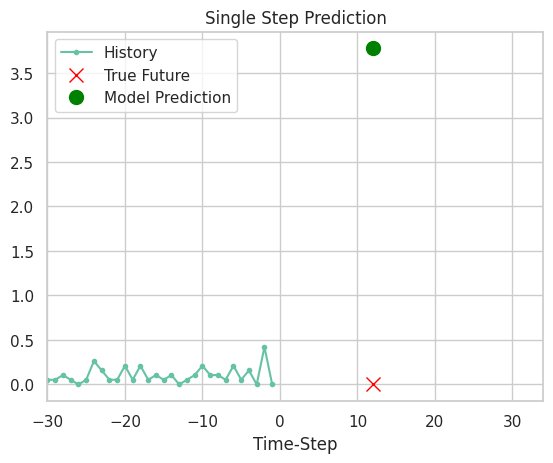

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


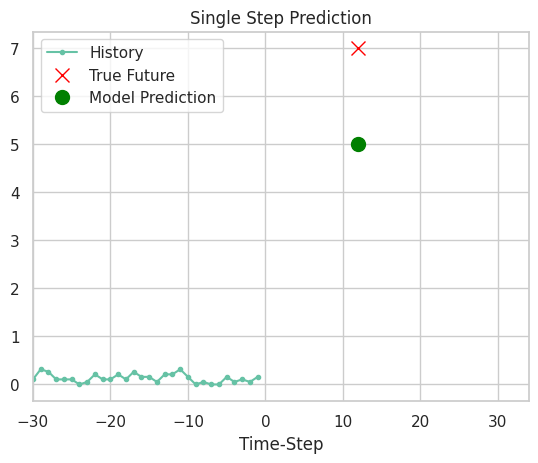

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


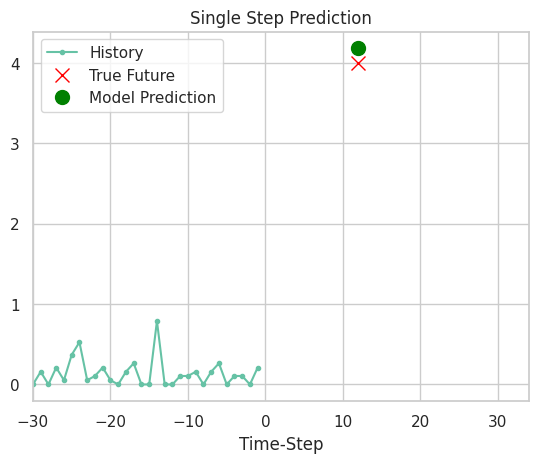

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


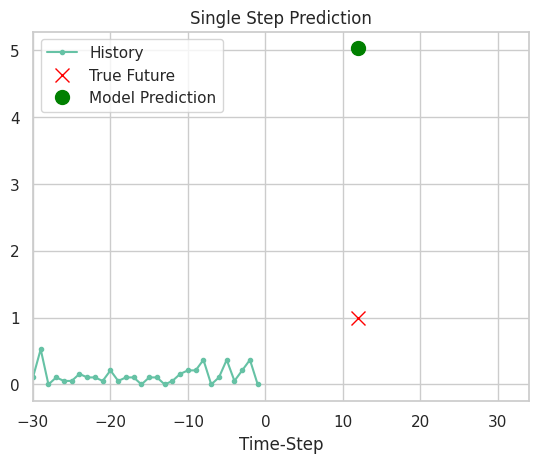

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


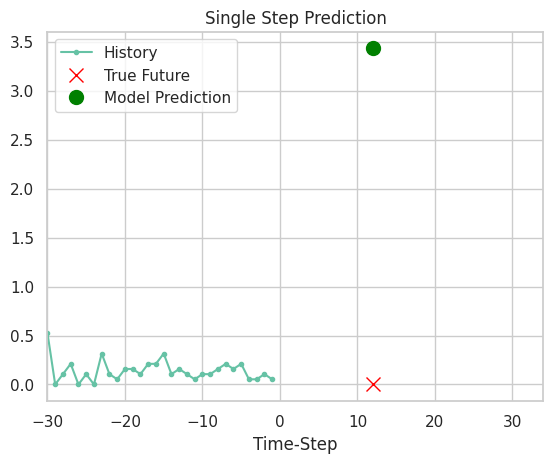

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


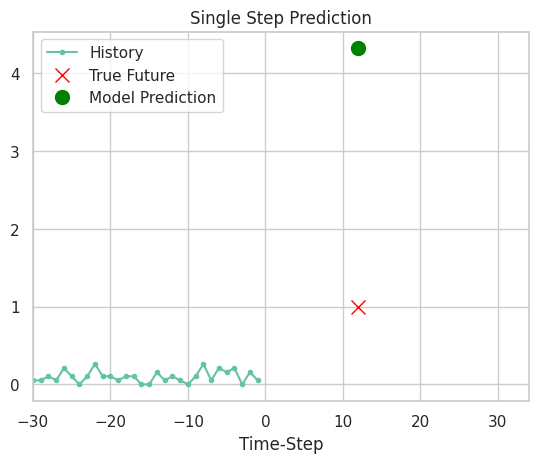

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


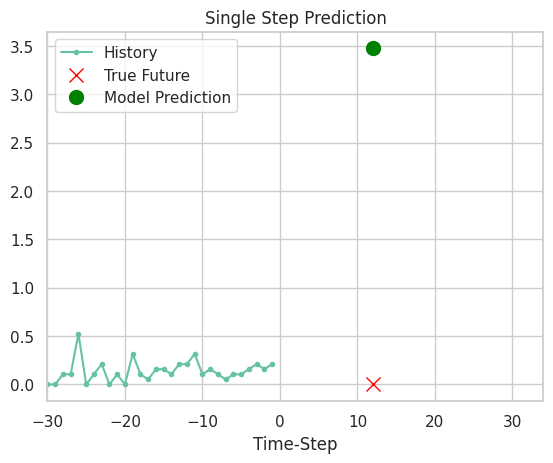

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


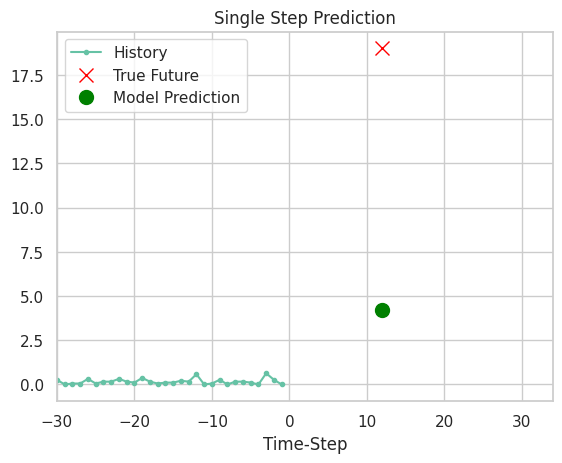

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


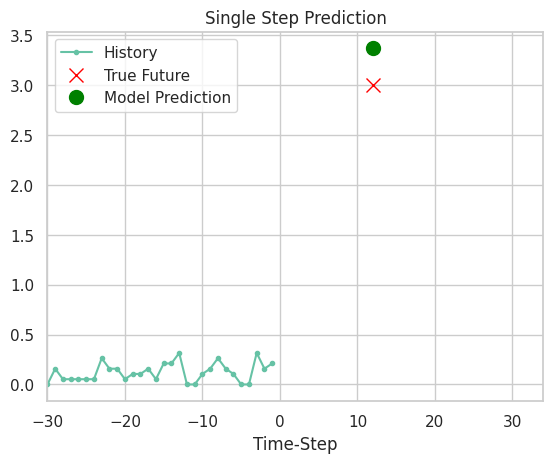

In [161]:
for x, y in test_dataset.take(20):
    show_preds(
        [x[0][:, 1].numpy(), y[0].numpy(), best_lstm_model.predict(x)[0]],
        12,
        "Single Step Prediction",
    )

### GRU

In [162]:
gru = gru_model(input_shape)
gru.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                          │ (None, 30, 32)              │           3,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 30, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ (None, 32)                  │           6,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,209 (39.88 KB)

 Trainable params: 10,209 (39.88 KB)

 Non-trainable params: 0 (0.00 B)

In [163]:
callbacks_gru = [
	tf.keras.callbacks.ModelCheckpoint(f'models/best_gru_{get_time()}.keras', save_best_only=True)
]

In [164]:
gru_history = gru.fit(
	train_dataset,
	epochs=25,
	validation_data=val_dataset,
	callbacks=callbacks_gru
)

Epoch 1/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 145ms/step - loss: 27.1470 - mean_absolute_error: 3.5418 - mean_squared_error: 27.1470 - val_loss: 21.2477 - val_mean_absolute_error: 3.0784 - val_mean_squared_error: 21.2477
Epoch 2/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 141ms/step - loss: 18.8541 - mean_absolute_error: 3.1974 - mean_squared_error: 18.8541 - val_loss: 18.9889 - val_mean_absolute_error: 2.9547 - val_mean_squared_error: 18.9889
Epoch 3/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step - loss: 18.5574 - mean_absolute_error: 3.2199 - mean_squared_error: 18.5574 - val_loss: 17.9543 - val_mean_absolute_error: 2.9215 - val_mean_squared_error: 17.9543
Epoch 4/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 145ms/step - loss: 18.6500 - mean_absolute_error: 3.2822 - mean_squared_error: 18.6500 - val_loss: 17.7477 - val_mean_absolute_error: 2.9137 - val_mean_squared_error: 17.7477
Epoch 5/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 146ms/step - loss: 17.8532 - mean_absolute_error: 3.2188 - mean_squared_error: 17.8532 - val_

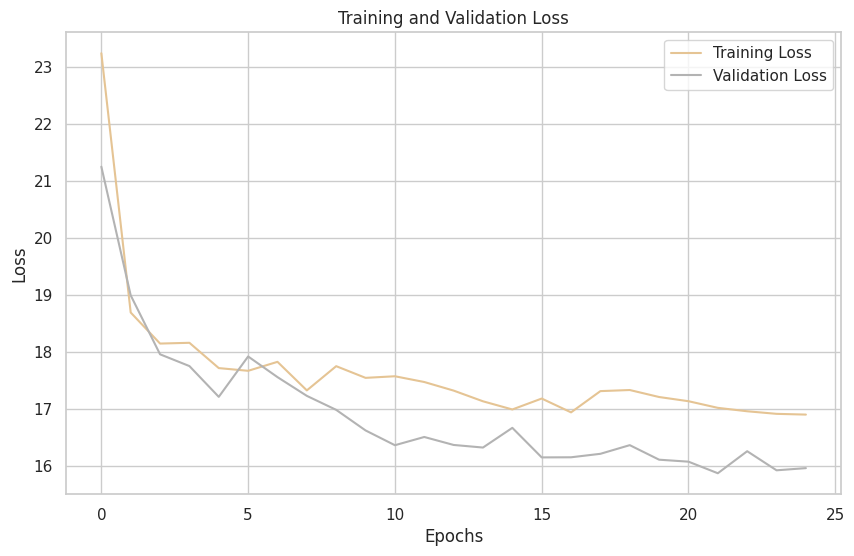

In [165]:
plot_loss(gru_history)

In [ ]:
best_gru_model = tf.keras.models.load_model('models/best_gru_23.keras')
gru_cat_evaluation = best_gru_model.evaluate(test_dataset)
print("Test MSE: %.4f" % gru_cat_evaluation[1])
print("Test MAE: %.4f" % gru_cat_evaluation[2])

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 17.2275 - mean_absolute_error: 3.1130 - mean_squared_error: 17.2275
Test MSE: 17.5823
Test MAE: 3.1809


### GRU 3

In [166]:
gru_3 = gru_model_3(input_shape)
gru_3.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_4 (GRU)                          │ (None, 30, 64)              │          13,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 30, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_5 (GRU)                          │ (None, 30, 32)              │           9,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 30, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_6 (GRU)                          │ (None, 32)                  │           6,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,601 (115.63 KB)

 Trainable params: 29,601 (115.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
callbacks_gru_3 = [
	tf.keras.callbacks.EarlyStopping(patience=2),
	tf.keras.callbacks.ModelCheckpoint(f'models/best_gru_3_{get_time()}.keras', save_best_only=True)
]

In [ ]:
gru_3_history = gru_3.fit(
	train_dataset,
	epochs=50,
	validation_data=val_dataset,
	callbacks=callbacks_gru_3
)

Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - loss: 24.6022 - mean_squared_error: 24.6022 - val_loss: 24.5838 - val_mean_squared_error: 24.5838
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - loss: 18.7777 - mean_squared_error: 18.7777 - val_loss: 23.0830 - val_mean_squared_error: 23.0830
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - loss: 17.2191 - mean_squared_error: 17.2191 - val_loss: 21.6849 - val_mean_squared_error: 21.6849
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 17.6270 - mean_squared_error: 17.6270 - val_loss: 21.6378 - val_mean_squared_error: 21.6378
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - loss: 16.8721 - mean_squared_error: 16.8721 - val_loss: 21.5214 - val_mean_squared_error: 21.5214
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 16.9673 - mean_squared_error: 16.9673 - val_loss: 20.5912 - val_mean_squared_error: 20.5912
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - loss: 17.1157 - mean_squared_error: 17.1

In [ ]:
plot_loss(gru_3_history)

In [ ]:
best_gru_3_model = tf.keras.models.load_model('best_gru_3.keras')
gru_3_evaluation = best_gru_3_model.evaluate(test_dataset)
print("Test MSE: %.4f" % gru_3_evaluation[1])
print("Test MAE: %.4f" % gru_3_evaluation[2])

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 14.5887 - mean_squared_error: 14.5887
Test MSE: 16.3934


## Predicción de 'Intake Dogs'

In [172]:
input_shape_dogs = (sequence_length, x_train_dog.shape[-1])
print("Input Shape: %s" % str(input_shape_dogs))

Input Shape: (30, 8)


### Simple RNN

In [173]:
simple_rnn_dog = simple_rnn_model(input_shape_dogs)
simple_rnn_dog.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_6 (SimpleRNN)             │ (None, 30, 32)              │           1,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 30, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_7 (SimpleRNN)             │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,425 (13.38 KB)

 Trainable params: 3,425 (13.38 KB)

 Non-trainable params: 0 (0.00 B)

In [174]:
callbacks_simple_dog = [
	tf.keras.callbacks.ModelCheckpoint(f'models/best_simple_dog_{get_time()}.keras', save_best_only=True)
]

In [175]:
simple_dog_history = simple_rnn_dog.fit(
	train_dog_dataset,
	epochs=25,
	validation_data=val_dog_dataset,
	callbacks=callbacks_simple_dog
)

Epoch 1/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - loss: 9.1423 - mean_absolute_error: 2.1704 - mean_squared_error: 9.1423 - val_loss: 13.7895 - val_mean_absolute_error: 1.9868 - val_mean_squared_error: 13.7895
Epoch 2/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 6.1667 - mean_absolute_error: 1.8033 - mean_squared_error: 6.1667 - val_loss: 13.6448 - val_mean_absolute_error: 1.9682 - val_mean_squared_error: 13.6448
Epoch 3/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 6.0158 - mean_absolute_error: 1.7890 - mean_squared_error: 6.0158 - val_loss: 13.5555 - val_mean_absolute_error: 1.9392 - val_mean_squared_error: 13.5555
Epoch 4/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.8082 - mean_absolute_error: 1.7429 - mean_squared_error: 5.8082 - val_loss: 13.6053 - val_mean_absolute_error: 1.9671 - val_mean_squared_error: 13.6053
Epoch 5/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 6.1965 - mean_absolute_error: 1.7857 - mean_squared_error: 6.1965 - val_loss: 13.4872 - v

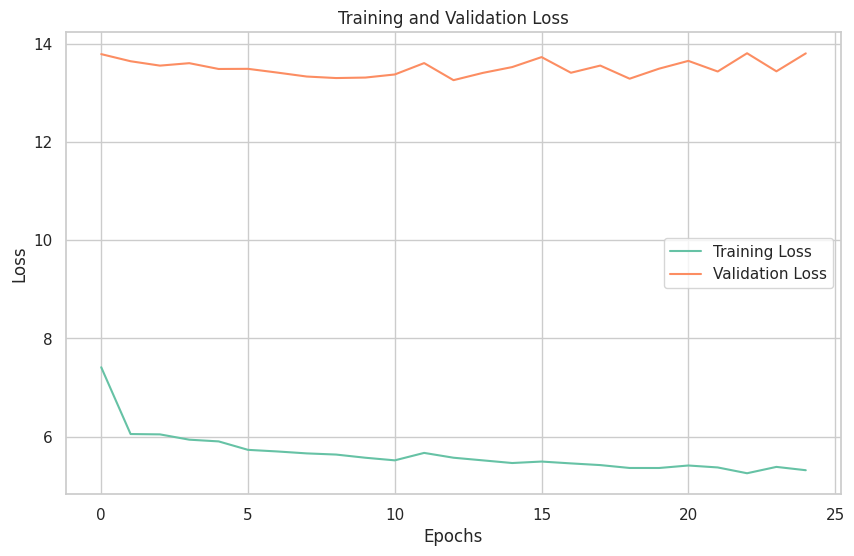

In [176]:
plot_loss(simple_dog_history)

In [ ]:
best_simple_dog_model = tf.keras.models.load_model('best_simple_dog_2.keras')
simple_dog_evaluation = best_simple_dog_model.evaluate(test_dog_dataset)
print("Test MSE: %.4f" % simple_dog_evaluation[1])
print("Test MAE: %.4f" % simple_dog_evaluation[2])

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 5.7566 - mean_absolute_error: 1.7173 - mean_squared_error: 5.7566
Test MSE: 5.5272
Test MAE: 1.7127


### LSTM

In [178]:
lstm_dog = lstm_model(input_shape_dogs)
lstm_dog.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 30, 32)              │           5,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 30, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 32)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,601 (53.13 KB)

 Trainable params: 13,601 (53.13 KB)

 Non-trainable params: 0 (0.00 B)

In [179]:
callbacks_lstm_dog = [
	tf.keras.callbacks.ModelCheckpoint(f'models/best_lstm_dog_{get_time()}.keras', save_best_only=True)
]

In [180]:
lstm_dog_history = lstm_dog.fit(
	train_dog_dataset,
	epochs=25,
	validation_data=val_dog_dataset,
	callbacks=callbacks_lstm_dog
)

Epoch 1/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - loss: 9.6109 - mean_absolute_error: 2.1638 - mean_squared_error: 9.6109 - val_loss: 13.4961 - val_mean_absolute_error: 1.9041 - val_mean_squared_error: 13.4961
Epoch 2/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 117ms/step - loss: 6.4823 - mean_absolute_error: 1.8521 - mean_squared_error: 6.4823 - val_loss: 13.4446 - val_mean_absolute_error: 1.8626 - val_mean_squared_error: 13.4446
Epoch 3/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - loss: 6.3969 - mean_absolute_error: 1.8220 - mean_squared_error: 6.3969 - val_loss: 13.5678 - val_mean_absolute_error: 1.9243 - val_mean_squared_error: 13.5678
Epoch 4/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 115ms/step - loss: 6.2002 - mean_absolute_error: 1.7837 - mean_squared_error: 6.2002 - val_loss: 13.5907 - val_mean_absolute_error: 1.9263 - val_mean_squared_error: 13.5907
Epoch 5/25
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 5.9842 - mean_absolute_error: 1.7489 - mean_squared_error: 5.9842 - val_loss: 13.582

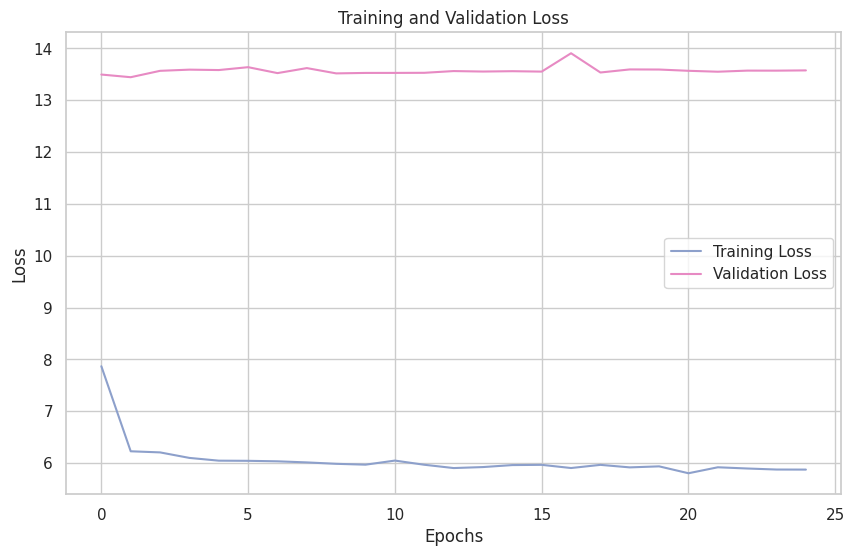

In [181]:
plot_loss(lstm_dog_history)

In [ ]:
best_lstm_dog_model = tf.keras.models.load_model('models/best_lstm_dog.keras')
lstm_dog_evaluation = best_lstm_dog_model.evaluate(test_dog_dataset)
print("Test MSE: %.4f" % lstm_dog_evaluation[1])
print("Test MAE: %.4f" % lstm_dog_evaluation[2])

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.7249 - mean_squared_error: 5.7249  
Test MSE: 5.7626


### GRU

In [182]:
gru_dog = lstm_model(input_shape_dogs)
gru_dog.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 30, 32)              │           5,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 30, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 32)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,601 (53.13 KB)

 Trainable params: 13,601 (53.13 KB)

 Non-trainable params: 0 (0.00 B)

In [184]:
callbacks_gru_dog = [
	# tf.keras.callbacks.EarlyStopping(patience=2),
	tf.keras.callbacks.ModelCheckpoint(f'models/best_gru_dog{get_time()}.keras', save_best_only=True)
]

In [185]:
gru_dog_history = gru_dog.fit(
	train_dog_dataset,
	epochs=50,
	validation_data=val_dog_dataset,
	callbacks=callbacks_gru_dog
)

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - loss: 9.3777 - mean_absolute_error: 2.1647 - mean_squared_error: 9.3777 - val_loss: 13.4435 - val_mean_absolute_error: 1.8766 - val_mean_squared_error: 13.4435
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 118ms/step - loss: 6.5051 - mean_absolute_error: 1.8443 - mean_squared_error: 6.5051 - val_loss: 13.5049 - val_mean_absolute_error: 1.9067 - val_mean_squared_error: 13.5049
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - loss: 6.3945 - mean_absolute_error: 1.8257 - mean_squared_error: 6.3945 - val_loss: 13.4392 - val_mean_absolute_error: 1.8361 - val_mean_squared_error: 13.4392
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 114ms/step - loss: 5.9516 - mean_absolute_error: 1.7387 - mean_squared_error: 5.9516 - val_loss: 13.5196 - val_mean_absolute_error: 1.8910 - val_mean_squared_error: 13.5196
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 116ms/step - loss: 5.8529 - mean_absolute_error: 1.7321 - mean_squared_error: 5.8529 - val_loss: 13.486

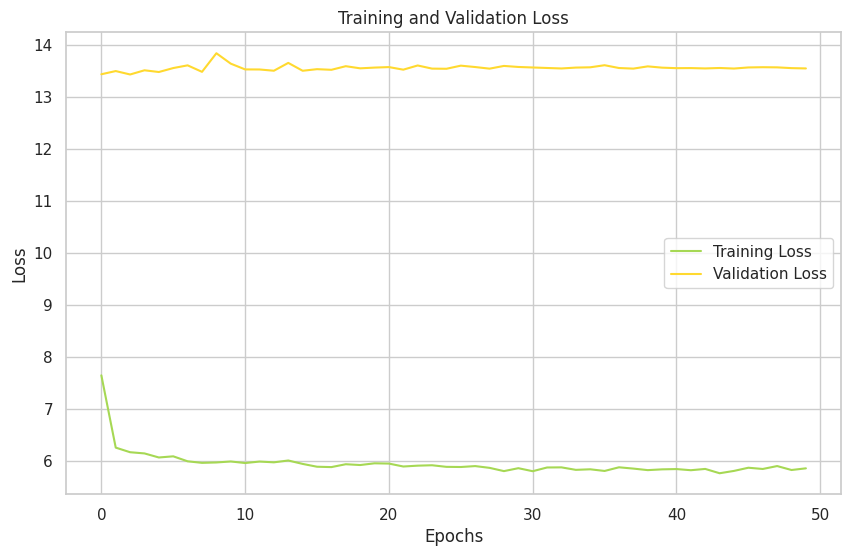

In [186]:
plot_loss(gru_dog_history)

In [187]:
best_gru_dog_model = tf.keras.models.load_model('models/best_gru_dog.keras')
gru_dog_evaluation = best_gru_dog_model.evaluate(test_dog_dataset)
print("Test MSE: %.4f" % gru_dog_evaluation[1])
print("Test MAE: %.4f" % gru_dog_evaluation[2])

ValueError: File not found: filepath=models/best_gru_dog.keras. Please ensure the file is an accessible `.keras` zip file.

# Helpers 🧰

In [115]:
def get_time():
  date = datetime.datetime.now()
  return date.strftime("%Y-%m-%d_%H-%M-%S")

## Data Helpers

In [7]:
def transform_data(dataframe: pd.DataFrame) -> pd.DataFrame:
	"""
	Transform the dataframe to a format that can be used for time series analysis
	:param dataframe: The dataframe to transform
	:return: The transformed dataframe
	"""

	# Tomo las columnas de interés para el análisis de series de tiempo: 'Intake DateTime', 'Movement DateTime', 'Return DateTime' y 'Deceased DateTime'.

	df_intake = dataframe[['Intake DateTime', 'Species Name', 'ID']].copy()
	df_intake = df_intake.drop_duplicates()  # eliminar las filas duplicadas

	df_movement = dataframe[['Movement DateTime', 'Species Name', 'ID']].copy()
	df_movement = df_movement.drop_duplicates()
	df_movement = df_movement.dropna()

	df_return = dataframe[['Return DateTime', 'Species Name', 'ID']].copy()
	df_return = df_return.drop_duplicates()
	df_return = df_return.dropna()

	df_deceased = dataframe[['Deceased DateTime', 'Species Name', 'ID']].copy()
	df_deceased = df_deceased.drop_duplicates()
	df_deceased = df_deceased.dropna()

	# Calculo la cantidad de perros y gatos que ingresaron/egresaron/fueron retornados/fallecieron por día.
	df_grouped_intake = df_intake.groupby(['Intake DateTime', 'Species Name']).size().unstack().fillna(0)
	df_grouped_intake.columns = df_grouped_intake.rename(columns={'Cat': 'Intake Cats', 'Dog': 'Intake Dogs'}).columns

	df_grouped_movement = df_movement.groupby(['Movement DateTime', 'Species Name']).size().unstack().fillna(0)
	df_grouped_movement.columns = df_grouped_movement.rename(columns={'Cat': 'Moved Cats', 'Dog': 'Moved Dogs'}).columns

	df_grouped_return = df_return.groupby(['Return DateTime', 'Species Name']).size().unstack().fillna(0)
	df_grouped_return.columns = df_grouped_return.rename(columns={'Cat': 'Returned Cats', 'Dog': 'Returned Dogs'}).columns

	df_grouped_deceased = df_deceased.groupby(['Deceased DateTime', 'Species Name']).size().unstack().fillna(0)
	df_grouped_deceased.columns = df_grouped_deceased.rename(columns={'Cat': 'Deceased Cats', 'Dog': 'Deceased Dogs'}).columns

	# Agrupo a todos los registros en un solo DataFrame

	# Reseteo los índices para poder concatenar los DataFrames en la fecha
	df_grouped_intake_reset = df_grouped_intake.reset_index()
	df_grouped_movement_reset = df_grouped_movement.reset_index()
	df_grouped_return_reset = df_grouped_return.reset_index()
	df_grouped_deceased_reset = df_grouped_deceased.reset_index()

	# Renombro las columnas para que tengan el mismo nombre
	df_grouped_intake_rename = df_grouped_intake_reset.rename(columns={'Intake DateTime': 'Date'})
	df_grouped_movement_rename = df_grouped_movement_reset.rename(columns={'Movement DateTime': 'Date'})
	df_grouped_return_rename = df_grouped_return_reset.rename(columns={'Return DateTime': 'Date'})
	df_grouped_deceased_rename = df_grouped_deceased_reset.rename(columns={'Deceased DateTime': 'Date'})

	df_grouped = pd.merge(df_grouped_intake_rename, df_grouped_movement_rename, on='Date', how='outer')
	df_grouped = pd.merge(df_grouped, df_grouped_return_rename, on='Date', how='outer')
	df_grouped = pd.merge(df_grouped, df_grouped_deceased_rename, on='Date', how='outer')

	df_grouped = df_grouped.fillna(0)
	df_grouped = df_grouped.set_index('Date', drop=True)
	df_grouped.index = pd.to_datetime(df_grouped.index)

	return df_grouped

## Plot Helpers 🎨

In [38]:
palette = sns.color_palette("Set2")
sns.set_theme(style='whitegrid', palette=palette)

def color_iterator(palette):
    """Function that iterates through the colors and starts over when reaching the end."""
    while True:
        for color in palette:
            yield color

palette_iter = color_iterator(palette)

In [59]:
def plot_series(dataframe: pd.DataFrame, title: str):
  """
  Plot the series of the dataframe
  :param dataframe: The dataframe to plot
  :param title: The title of the plot
  :return: None
  """

  plt.figure(figsize=(10, 6))
  sns.lineplot(data=dataframe, dashes=False)
  plt.title(title)
  plt.xlabel('Date')
  plt.ylabel('Quantity')
  plt.show()

In [10]:
def plot_category(dataframe: pd.DataFrame, category: str, title: str):
	"""
	Plot a single category from the dataframe
	:param dataframe: The dataframe to plot
	:param category: The category to plot
	:param title: The title of the plot
	:return: None
	"""

	plt.figure(figsize=(10, 6))
	sns.lineplot(data=dataframe, y=category, x=dataframe.index, color = next(palette_iter))
	plt.title(title)
	plt.xlabel('Date')
	plt.ylabel('Quantity')
	plt.show()

In [11]:
def plot_cat_categories(dataframe: pd.DataFrame):
	"""
	Plot the categories related to cats from the dataframe
	:param dataframe: The dataframe to plot
	:return: None
	"""
	sns.set_theme(style='whitegrid', palette='Set2')

	fig, axs = plt.subplots(2, 2, figsize=(10, 6))
	sns.lineplot(data=dataframe, y='Intake Cats', x=dataframe.index, ax=axs[0, 0], color = next(palette_iter))
	sns.lineplot(data=dataframe, y='Moved Cats', x=dataframe.index, ax=axs[0, 1], color = next(palette_iter))
	sns.lineplot(data=dataframe, y='Returned Cats', x=dataframe.index, ax=axs[1, 0], color = next(palette_iter))
	sns.lineplot(data=dataframe, y='Deceased Cats', x=dataframe.index, ax=axs[1, 1], color = next(palette_iter))
	plt.tight_layout()
	plt.show()

In [12]:
def plot_dog_categories(dataframe: pd.DataFrame):
	"""
	Plot the categories regarding dogs of the dataframe
	:param dataframe: The dataframe to plot
	:return: None
	"""
	sns.set_theme(style='whitegrid', palette='Set2')

	fig, axs = plt.subplots(2, 2, figsize=(10, 6))
	sns.lineplot(data=dataframe, y='Intake Dogs', x=dataframe.index, ax=axs[0, 0], color = next(palette_iter))
	sns.lineplot(data=dataframe, y='Moved Dogs', x=dataframe.index, ax=axs[0, 1], color = next(palette_iter))
	sns.lineplot(data=dataframe, y='Returned Dogs', x=dataframe.index, ax=axs[1, 0], color = next(palette_iter))
	sns.lineplot(data=dataframe, y='Deceased Dogs', x=dataframe.index, ax=axs[1, 1], color = next(palette_iter))
	plt.title('Dogs')
	plt.tight_layout()
	plt.show()


In [77]:
def boxplot(dataframe: pd.DataFrame, title: str):
	"""
	Plot the boxplot of the dataframe
	:param dataframe: The dataframe to plot
	:param title: The title of the plot
	:return: None
	"""

	plt.figure(figsize=(10, 6))
	sns.boxplot(data=dataframe, orient='v')

	plt.xlabel('Category')
	plt.ylabel('Quantity')
	plt.show()

In [78]:
def compare_boxplots(df1: pd.DataFrame, df2: pd.DataFrame, df3: pd.DataFrame, category: str, title:str):
	"""
	Compare the boxplots of the three dataframes
	:param df1: The first dataframe
	:param df2: The second dataframe
	:param df3: The third dataframe
	:param category: The category to compare
	:param title: The title of the plot
	:return: None
	"""

	fig, axs = plt.subplots(1, 3, figsize=(10, 6))
	sns.boxplot(data=df1, y=category, orient='v', ax=axs[0], color = next(palette_iter))
	axs[0].set_title('Original')
	axs[0].set_ylabel('Quantity')
	sns.boxplot(data=df2, y=category, orient='v', ax=axs[1], color = next(palette_iter))
	axs[1].set_title('Daily')
	axs[1].set_ylabel('Quantity')
	sns.boxplot(data=df3, y=category, orient='v', ax=axs[2], color = next(palette_iter))
	axs[2].set_title('Weekly')
	axs[2].set_ylabel('Quantity')

	plt.tight_layout()
	plt.show()

In [15]:
def plot_loss(history):
	# plt.plot(history.history['loss'], label='Training Loss')
	# plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.figure(figsize=(10, 6))
  sns.lineplot(data=history.history['loss'], label='Training Loss', color = next(palette_iter))
  sns.lineplot(data=history.history['val_loss'], label='Validation Loss', color = next(palette_iter))
  plt.title('Training and Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [94]:
# plot autocorrelation
def plot_autocorrelation(df: pd.DataFrame, feature: str, lags: int):
  plot_acf(df[feature], lags=lags)
  plt.title(f'Autocorrelation of {feature} with lag={lags}')
  plt.xlabel('Lag')
  plt.ylabel('Autocorrelation')
  plt.show()

### Predictions

In [159]:
def show_preds(plot_data, delta, title):
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "rx", "go"]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, val in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future + 5) * 2])
    plt.xlabel("Time-Step")
    plt.show()
    return


# for x, y in test_dataset.take(10):
#     show_plot(
#         [x[0][:, 1].numpy(), y[0].numpy(), best_gru_model.predict(x)[0]],
#         12,
#         "Single Step Prediction",
# )

In [ ]:
# Make predictions

predictions = best_lstm_model.predict(test_dataset)

# for i in range(len(predictions)):
#   print(predictions[i,-1,0],true_values[i+36])

# print(true_values.shape)

# Plot predictions vs. true values
plt.figure(figsize=(14, 6))
plt.plot(true_values[36:], label='True Values', color='blue')
plt.plot(predictions[:,-1,0], label='Predictions', color='red', linestyle='dashed')
plt.title('Predictions vs True Values')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()
plt.show()

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(32, 7), dtype=float32). Expected shape (None, 30, 7), but input has incompatible shape (32, 7)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 7), dtype=float32)
  • training=False
  • mask=None